In [126]:
import os
import pandas as pd             # библиотека для анализа данных
import sqlite3                  # подключение к базе данных SQLite3        
import matplotlib.pyplot as plt # построение графиков
import numpy as np

# Текущая директория
ROOT_PATH = os.path.abspath(os.curdir)

# Визуальный анализ данных с помощью Python

## Визуализация с помощью Seaborn

In [151]:
import seaborn as sns

# читаем датасет
df_opl = pd.read_csv(os.path.join(ROOT_PATH,'openpowerlifting.csv'), sep=',')
df_opl.columns

C:\Anaconda3\envs\gis_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

C:\Anaconda3\envs\gis_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Equipment', ylabel='count'>

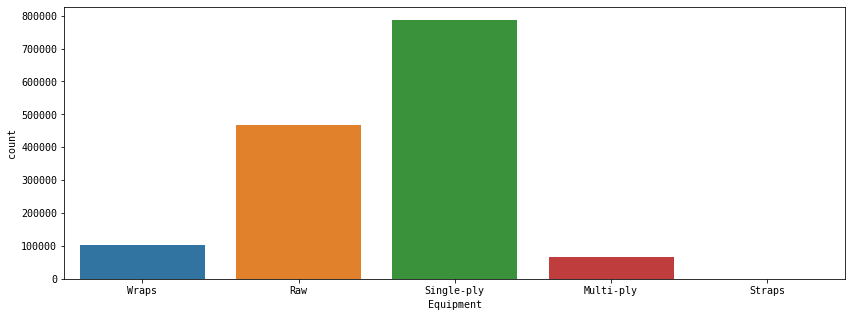

In [152]:
# аналог Pandas BORN
fig = plt.figure(figsize=(14,5))
sns.countplot(df_opl['Equipment'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

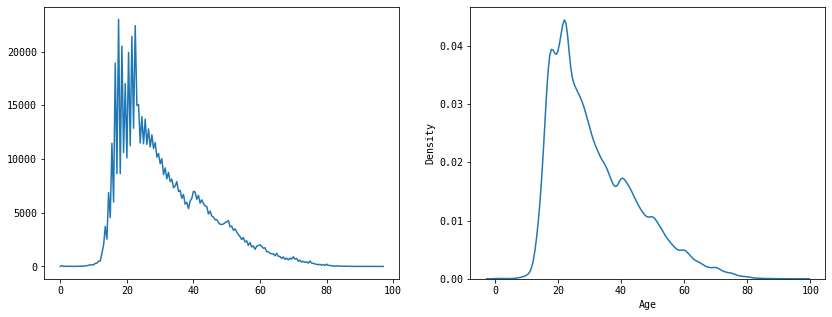

In [153]:
# сглаживаниие
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
# 
df_opl['Age'].value_counts().sort_index().plot.line()
# оценка плотности ядра (статистика)
ax1 = fig.add_subplot(122)
sns.kdeplot(df_opl.Age)

In [ ]:
# сглаживаниие
fig = plt.figure(figsize=(14,5))
# sns.kdeplot(df_opl.loc[:, ['BodyweightKg','Age']].dropna().sample(5000), color='b', cmap="Reds", shade=True, shade_lowest=False)                       
sns.kdeplot(df_opl.loc[:, ['BodyweightKg','Age']].dropna().sample(5000), color='b')

In [ ]:
#


In [150]:
df_opl.loc[:, ['BodyweightKg','Age']].dropna().sample(5000)

,BodyweightKg,Age
1232984,72.25,26.0
1349771,152.00,35.5
903365,71.20,14.0
975047,71.10,29.5
776635,91.18,35.5
...,...,...
901238,82.30,41.0
833802,56.52,31.0
212883,70.95,21.5
17966,91.00,27.0


In [156]:
# читаем датасет
df_opl = pd.read_csv(os.path.join(ROOT_PATH,'tips.csv'), sep=',')
df_opl.columns


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [173]:
df_opl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Для визуализации распределения метрических переменных используются следующие типы графиков:
- displot

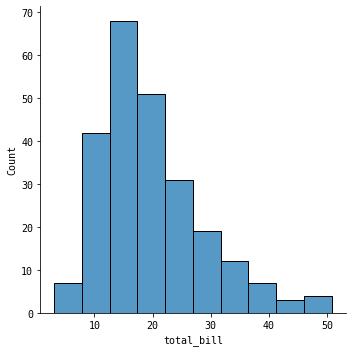

In [165]:
# displot 1
sns.displot(df_opl['total_bill'], bins=10)
# или
# sns.displot(df_opl['total_bill'], kde=False, bins=10)

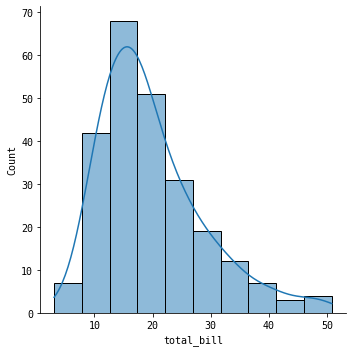

In [166]:
# displot 2
sns.displot(df_opl['total_bill'], kde=True, bins=10)

- jointplot

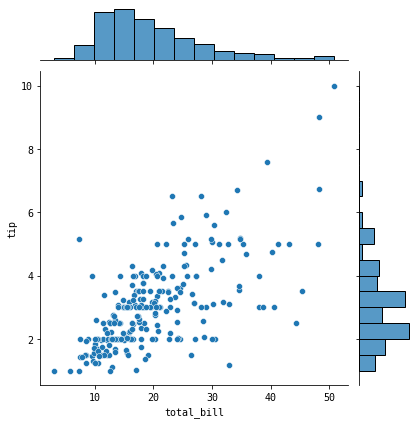

In [167]:
# SCARRET
sns.jointplot(x='total_bill', y='tip', data=df_opl, kind='scatter')

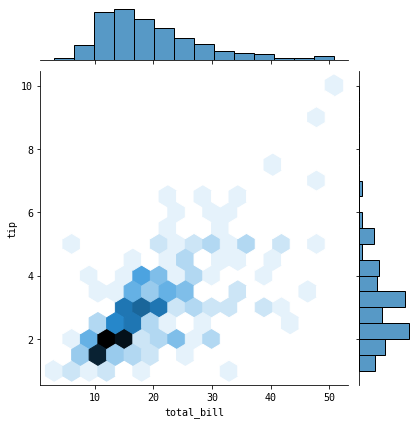

In [169]:
# HEX
sns.jointplot(x='total_bill',y='tip',data=df_opl, kind='hex')

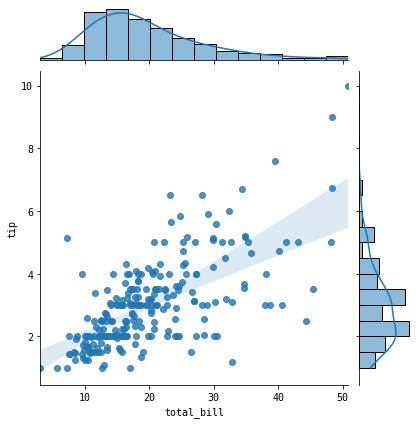

In [170]:
# REG
sns.jointplot(x='total_bill',y='tip',data=df_opl, kind='reg')

- pairplot - показывает отношения между всеми парами переменных.

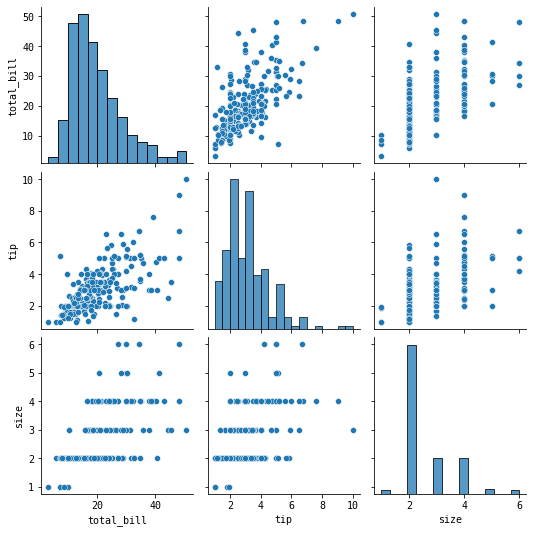

In [171]:
sns.pairplot(df_opl)

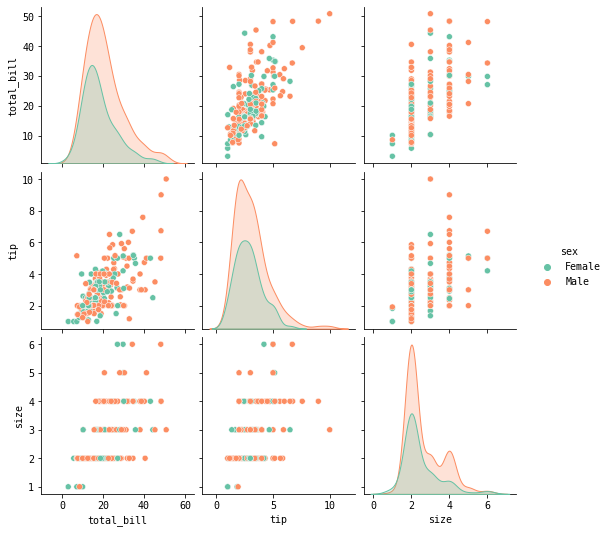

In [175]:
sns.pairplot(df_opl, hue='sex', palette='Set2')

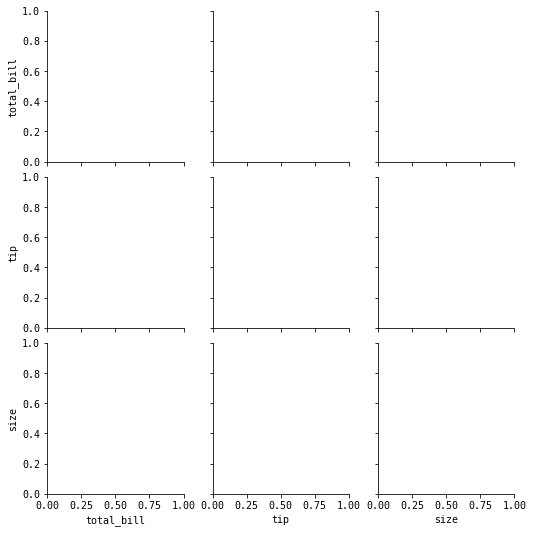

In [176]:
sns.PairGrid(df_opl)

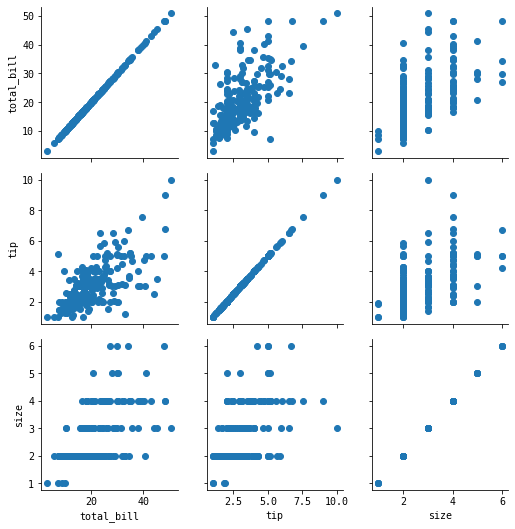

In [177]:
g = sns.PairGrid(df_opl)
# matplotlib
g.map(plt.scatter)

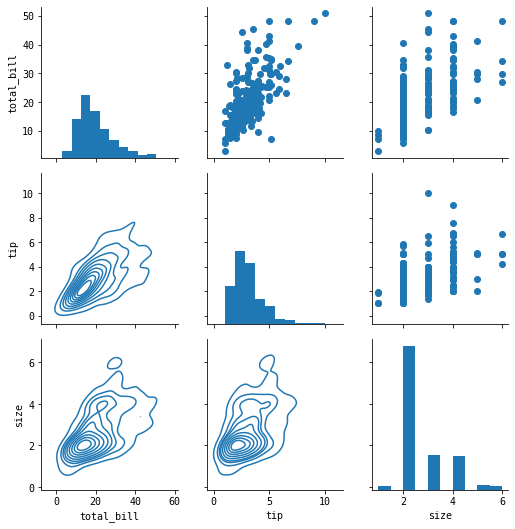

In [181]:
g = sns.PairGrid(df_opl)
# matplotlib
g.map_diag(plt.hist) # диагональ
g.map_upper(plt.scatter) # правый верх
g.map_lower(sns.kdeplot) # левый низ

- kdeplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

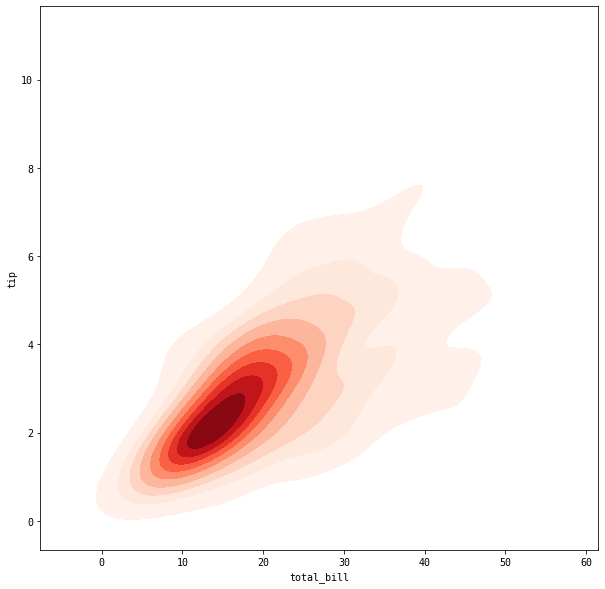

In [190]:
sns.kdeplot(x='total_bill', y='tip', data=df_opl, color='r', cmap='Reds', shade=True, thresh=0.05)